In [146]:
df_data = pd.read_csv('data.csv', encoding='Latin-1')

In [147]:
# Cek jumlah kolom dan total data
df_data.shape

(13169, 13)

In [148]:
#Cek total duplikat data
df_data.duplicated().sum()

125

In [94]:
df_data = df_data.drop_duplicates()
df_data.shape

(13044, 13)

In [99]:
#cek missing values
df_data.isna().sum()/df_data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [104]:
#Cek kondisi data terakhir 
df_data.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [145]:
#visualisasi
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import pandas as pd
import re
# % matplotlib inline

#prerocessing
from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

from nltk.stem import WordNetLemmatizer

import nltk
# nltk.download('all')
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#encoder
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split

#feture engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#modeling
from sklearn.svm import SVC

#evaluation model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estika.ginting.ROOT\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
df_data['total_char'] = df_data.Tweet.apply(len)

In [118]:
# Membuat total_world untuk menghitung jumlah kata dari setiap baris
df_data['total_word'] = df_data.Tweet.apply(lambda sent: len(sent.split()))

In [119]:
df_data.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  total_word  total_char  
0         1        1            0          0          25         138  
1         0        0            0          0          21         120  
2         0        0            0          0          37         254  
3         0        0            0          0          14          75  
4         0        0            1          0          14          89

# **Univariate Analysis**

In [120]:
df_data.mean()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\1150472567.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data.mean()


HS                 0.423030
Abusive            0.383701
HS_Individual      0.271389
HS_Group           0.151641
HS_Religion        0.060488
HS_Race            0.043162
HS_Physical        0.024686
HS_Gender          0.023306
HS_Other           0.284115
HS_Weak            0.256670
HS_Moderate        0.130175
HS_Strong          0.036185
total_word        17.264259
total_char       114.124348
dtype: float64

In [121]:
df_data.median()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\2955573202.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data.median()


HS                 0.0
Abusive            0.0
HS_Individual      0.0
HS_Group           0.0
HS_Religion        0.0
HS_Race            0.0
HS_Physical        0.0
HS_Gender          0.0
HS_Other           0.0
HS_Weak            0.0
HS_Moderate        0.0
HS_Strong          0.0
total_word        15.0
total_char       100.0
dtype: float64

In [125]:
# untuk mencari frekuensi data yang sering muncuk
df_data['total_char'].mode()

0    254
Name: total_char, dtype: int64

In [126]:
df_data['total_word'].mode()

0    11
Name: total_word, dtype: int64

# **Measures of Spread**

In [128]:
range_total_word = df_data.total_word.max() - df_data.total_word.min()
range_total_word

51

In [129]:
range_total_char = df_data.total_char.max() - df_data.total_char.min()
range_total_char

557

# **Quartile dan IQR**

In [138]:
df_data['total_word'].describe()

count    13044.000000
mean        17.264259
std         10.242584
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         52.000000
Name: total_word, dtype: float64

In [139]:
df_data['total_char'].describe()

count    13044.000000
mean       114.124348
std         69.101629
min          4.000000
25%         59.000000
50%        100.000000
75%        152.000000
max        561.000000
Name: total_char, dtype: float64

In [143]:
df_data.var()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\1408312298.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data.var()


HS                  0.244094
Abusive             0.236493
HS_Individual       0.197752
HS_Group            0.128656
HS_Religion         0.056833
HS_Race             0.041302
HS_Physical         0.024078
HS_Gender           0.022764
HS_Other            0.203409
HS_Weak             0.190805
HS_Moderate         0.113238
HS_Strong           0.034879
total_word        104.910534
total_char       4775.035061
dtype: float64

In [144]:
df_data.skew()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\3952461904.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data.skew()


HS               0.311631
Abusive          0.478368
HS_Individual    1.028331
HS_Group         1.942718
HS_Religion      3.687795
HS_Race          4.496498
HS_Physical      6.127256
HS_Gender        6.319885
HS_Other         0.957487
HS_Weak          1.114289
HS_Moderate      2.198351
HS_Strong        4.967777
total_word       0.789820
total_char       0.693647
dtype: float64

In [1]:
!pip install sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)


You should consider upgrading via the 'D:\PROJECT - CSI\10. Tugas CH3T3\Filter_Tweets\env_tweet\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install wordcloud

In [ ]:
!pip install nltk

In [ ]:
!pip install scikit-learn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estika.ginting.ROOT\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
df_data = pd.read_csv('data.csv', encoding='Latin-1')


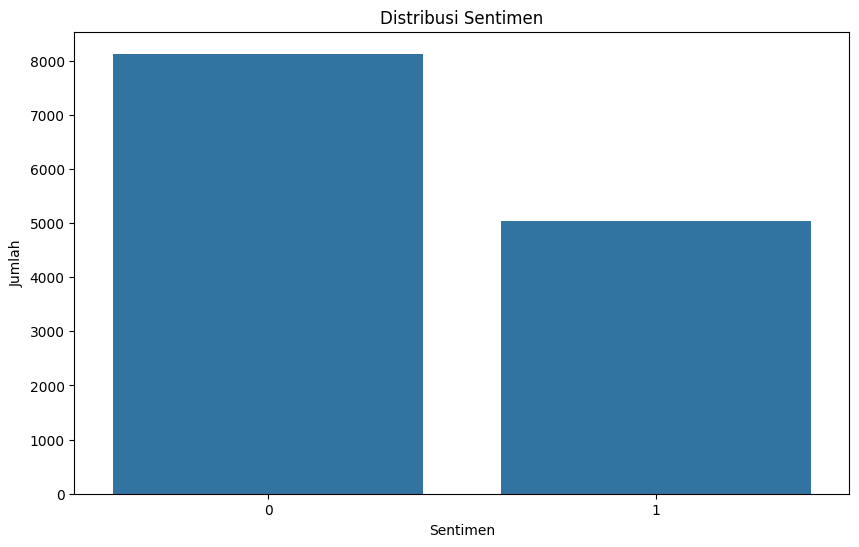

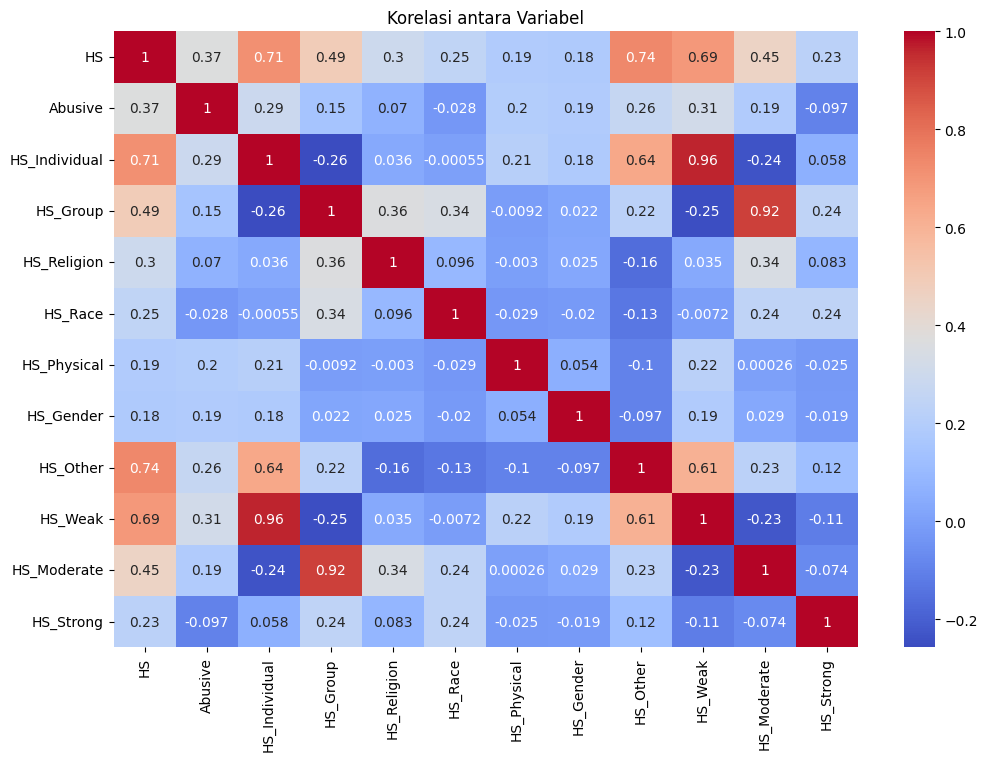

In [70]:
#TESTING CUY
import seaborn as sns
# Visualisasi distribusi label sentimen
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Abusive')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi korelasi antara variabel
plt.figure(figsize=(12, 8))
sns.heatmap(df_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel')
plt.show()


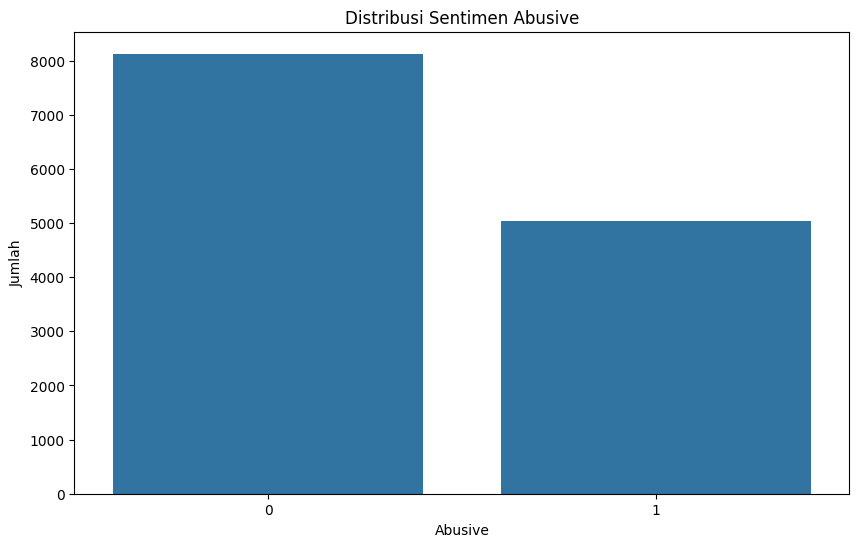

In [71]:
# Visualisasi distribusi sentimen abusive
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Abusive')
plt.title('Distribusi Sentimen Abusive')
plt.xlabel('Abusive')
plt.ylabel('Jumlah')
plt.show()

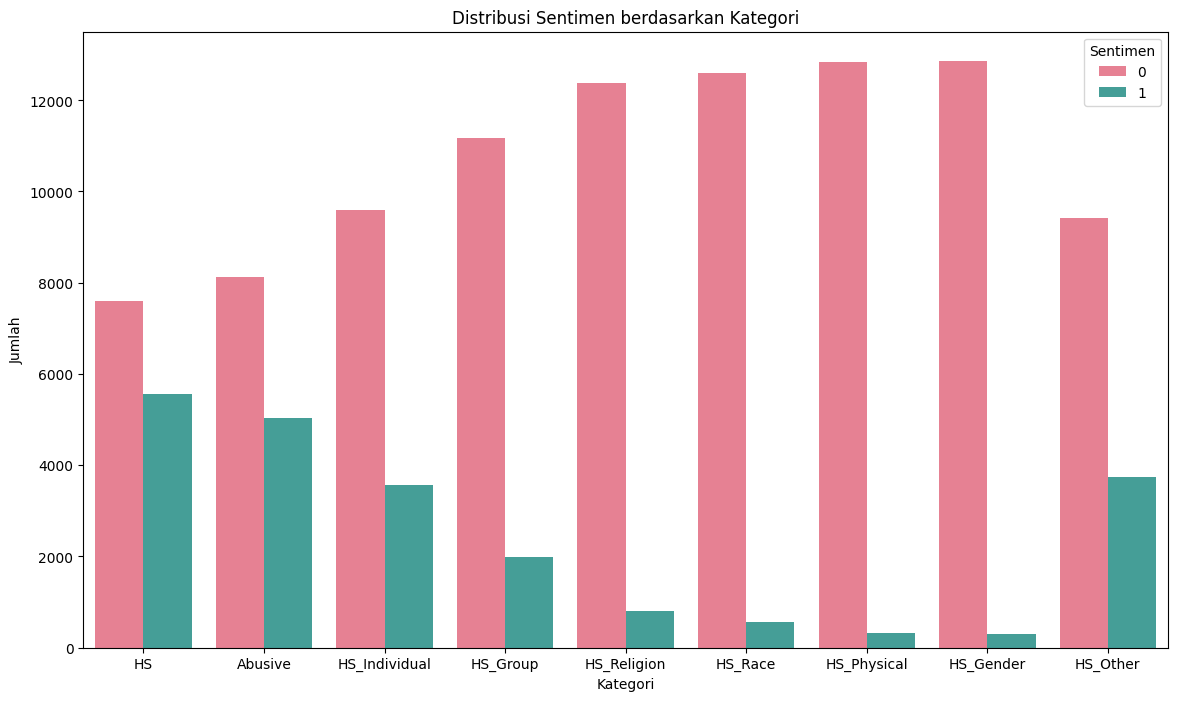

In [72]:
# Melting data frame
melted_df = df_data[['HS','Abusive','HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']].melt()

# Visualisasi distribusi sentimen berdasarkan kategori
plt.figure(figsize=(14, 8))
sns.countplot(data=melted_df, x='variable', hue='value', palette='husl')
plt.title('Distribusi Sentimen berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.legend(title='Sentimen')
plt.show()


C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\3981485435.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melted_df, x='Tingkat Keparahan', y='Jumlah', palette=color_dict)


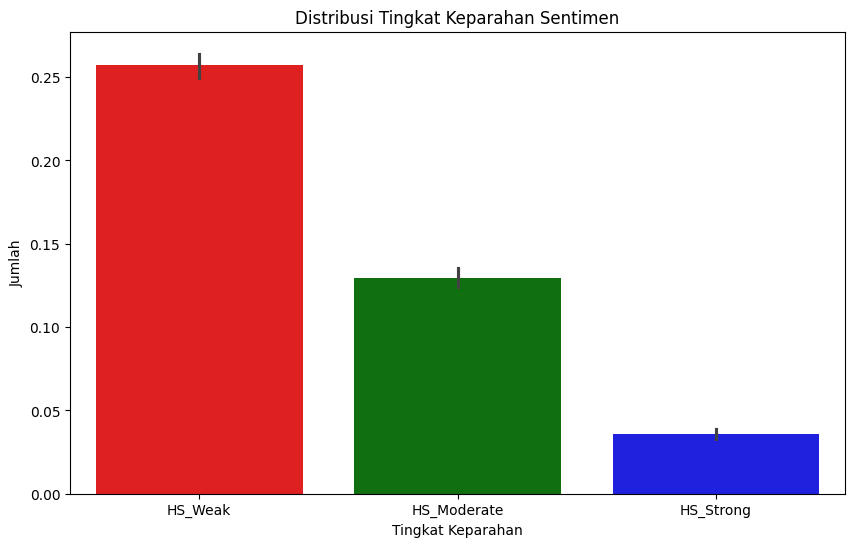

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt DataFrame untuk mengubah kolom menjadi baris
melted_df = df_data[['HS_Weak', 'HS_Moderate', 'HS_Strong']].melt(var_name='Tingkat Keparahan', value_name='Jumlah')

# Mendefinisikan warna untuk setiap tingkat keparahan
color_dict = {'HS_Weak': 'red', 'HS_Moderate': 'green', 'HS_Strong': 'blue'}

# Visualisasi menggunakan seaborn.barplot()
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Tingkat Keparahan', y='Jumlah', palette=color_dict)
plt.title('Distribusi Tingkat Keparahan Sentimen')
plt.xlabel('Tingkat Keparahan')
plt.ylabel('Jumlah')
plt.show()


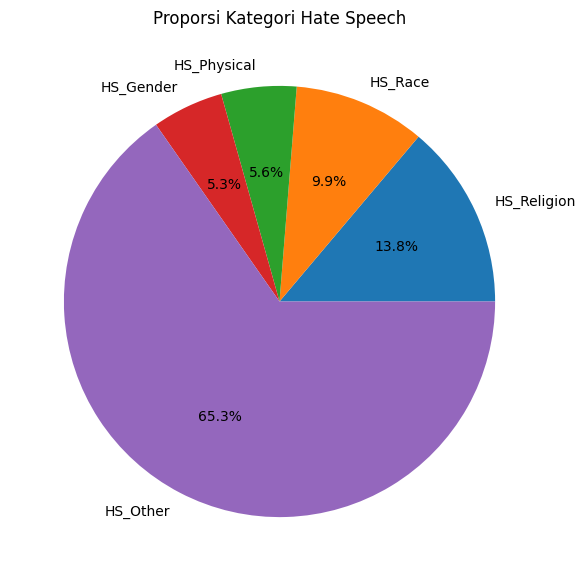

In [74]:
categories = ['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
counts = [df_data[category].sum() for category in categories]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Proporsi Kategori Hate Speech')
plt.show()

In [75]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# **Pre-Processing Data**

In [76]:
len(df_data)

13169

## **Cleaning Data missing**

In [77]:
new_data_clean = df_data.dropna()
new_data_clean = df_data.drop_duplicates()

len(new_data_clean)

13044

In [78]:
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [79]:
len(new_data_clean)

13044

## **Lowe/Upper Case**

In [80]:
new_data_clean ['result_text_clean']= new_data_clean['Tweet'].apply(lambda x: str(x).lower())
new_data_clean.head()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\634910523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean ['result_text_clean']= new_data_clean['Tweet'].apply(lambda x: str(x).lower())


Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  
0  - disaat semua cowok berusaha melacak perhatia...  
1  rt user: user siapa yang telat ngasih tau elu?...  
2  41. kadang aku berfikir, kenapa aku tetap perc...  
3  user user aku itu aku\n\nku tau matamu sipit t...  
4  user user kaum cebong kapir udah keliatan dong...

## **Cleaning Data**

In [81]:
def data_cleansing (text):
    # Hilangkan karakter non-alfanumerik kecuali spasi
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Hilangkan text xX & A-F & 0-9
    text = re.sub(r'[xX][0-9a-fA-F]{2}', '', text)
    text = re.sub(r'(?<=\D)(?=\d)|(?<=\d)(?=\D)', ' ', text)
    # Memeriksa apakah terdapat angka di awal atau di akhir kalimat
    text = re.sub(r'^(\d+)|(\d+)$', r'\1\2 ', text)
    # Menambahkan spasi antara digit dan karakter non-digit
    text = re.sub(r'(\d+)(\D+)', r'\1 \2', text)
    # Pisahkan kata-kata dengan spasi tunggal
    text = re.sub(r'\s+', ' ', text)
    # Menhapus kata "user" yang berulang
    text = re.sub(r'\b(user\s+)\1+', r'\1', text)
    
    return text

In [82]:
new_data_clean['result_text_clean'] = new_data_clean['result_text_clean'].apply(lambda x: data_cleansing(x))
new_data_clean.head()

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\235240686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['result_text_clean'] = new_data_clean['result_text_clean'].apply(lambda x: data_cleansing(x))


Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  
0   disaat semua cowok berusaha melacak perhatian...  
1  rt user siapa yang telat ngasih tau eluedan sa...  
2  41 kadang aku berfikir kenapa aku tetap percay...  
3  user aku itu akunnku tau matamu sipit tapi dil...  
4  user kaum cebong kapir udah keliatan dongoknya...

In [83]:
print ('before :', new_data_clean['Tweet'][172])
print ('----------------------------------')
print ('after :', new_data_clean['result_text_clean'][172])

before : USER wakakakaka aku sudah mengalaminya \xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82 tetiba muncul grub wa a.n Bani Abd Hadi a.k.a mbahku dan seketika aku mek kenal beberapa orang saja \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf0\x9f\xa4\
----------------------------------
after : user wakakakaka aku sudah mengalaminya tetiba muncul grub wa an bani abd hadi aka mbahku dan seketika aku mek kenal beberapa orang saja 


## **Stemming**

In [88]:
start_time = datetime.now()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_data_clean['review_steem'] = new_data_clean['result_text_clean'].apply(lambda x: stemmer.stem(x))
new_data_clean.head()

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

KeyboardInterrupt: 

## **Lemmatization**

In [67]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\estika.ginting.ROOT\AppData\Roaming\nltk_data
[nltk_data]     ...


True

In [85]:
# Import modul datetime
from datetime import datetime

# Import modul WordNetLemmatizer dari NLTK
from nltk.stem import WordNetLemmatizer

# Lemmatization menggunakan NLTK
start_time = datetime.now()

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Melakukan lemmatization pada kolom 'result_text_clean' dan menyimpan hasilnya dalam kolom baru 'review_lemmatizer'
new_data_clean['review_lemmatizer'] = new_data_clean['result_text_clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

# Menampilkan lima baris pertama dari DataFrame 'new_data_clean'
new_data_clean.head()


Waktu yang diperlukan: 0:00:04.354108


C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_21436\3001486218.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_lemmatizer'] = new_data_clean['result_text_clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau matamu sipit tapi dil...   
4  user kaum cebong kapir udah keliatan dongoknya...   

                                   review_lemmatizer  
0  [ , d, i, s, a, a, t,  , s, e, m, u, a,  , c, ...  
1  [r, t,  , u, s, e, r,  , s, i, a, p, a,  , y, ...  
2  [4, 1,  , k, a, d, a, n, g,  , a, k, u,  , b, ...  
3  [u, s, e, r,  , a, k, u,  , i, t, u,  , a, k, ...  
4  [u, s, e, r,  , k, a, u, m,  , c, e, b, o, n, ...

## **Stop Words**

## **Sastrawi**

In [86]:
factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()
len(list_stopword)



126

In [87]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

new_data_clean['review_stp_sasatrawi'] = new_data_clean['review_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split()))
new_data_clean.head()

KeyError: 'review_steem'

# **NLTK**

In [44]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [45]:
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [46]:
stop = list_stopwords
new_data_clean['review_stp_nltk']= new_data_clean['review_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user user siapa yang telat ngasih tau elued...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user user aku itu akunnku tau matamu sipit tap...   
4  user user kaum cebong kapir udah keliatan dong...   

                                        review_steem  \
0  saat semua cowok usaha lacak perhati gue loe l...   
1  rt user user siapa yang telat ngasih tau elued...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user user aku itu akunnku tau mata sipit tapi ...   
4  user user kaum cebong kapir udah liat dongok d...   

                                review_stp_sasatrawi  \
0   semua cowok usaha lacak perhati gue loe lanta...   
1  rt user user siapa  telat ngasih tau eluedan s...   
2  41 kadang aku berfikir  aku tetap percaya  tuh...   
3  user user aku  akunnku tau mata sipit  liat  m...   
4  user user kaum cebong kapir udah liat dongok  ...   

                                     review_stp_nltk  
0  cowok usaha lacak perhati gue loe lantas remeh...  
1  rt user user telat ngasih tau eluedan sarap gu...  
2  41 kadang berfikir percaya tuhan jatuh berkali...  
3              user user akunnku tau mata sipit liat  
4  user user kaum cebong kapir udah liat dongok d...

# **EDA**

In [49]:
new_data_clean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0             1        1            0          0   
1             0        0            0          0   
2             0        0            0          0   
3             0        0            0          0   
4             0        0            1          0   
...         ...      ...          ...        ...   
13164         0        1            0          0   
13165         0        0            0          0   
13166         0        0            0          0   
13167         0        0            0          0   
13168         1        1            0          0   

                                       result_text_clean  \
0       disaat semua cowok berusaha melacak perhatian...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau matamu sipit tap...   
4      user user kaum cebong kapir udah keliatan dong...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg s...   
13165                        user kasur mana enak kunyuk   
13166            user hati hati bisu gnnlagi bosan huft    
13167  user user user user bom yang real mudah terdet...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                            review_steem  \
0      saat semua cowok usaha lacak perhati gue loe l...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau mata sipit tapi ...   
4      user user kaum cebong kapir udah liat dongok d...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg k...   
13165                        user kasur mana enak kunyuk   
13166             user hati hati bisu gnnlagi bosan huft   
13167  user user user user bom yang real mudah deteks...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                    review_stp_sasatrawi  \
0       semua cowok usaha lacak perhati gue loe lanta...   
1      rt user user siapa 

In [ ]:
df['total_word'] = df.Tweet.apply(lambda text: len(text.split(" ")) )
df['total_char'] = df.Tweet.apply(lambda text: len(text))
df.head()
     

In [42]:
#set(new_data_clean['Tweet]

In [ ]:
#wordclod berdasarkan produk

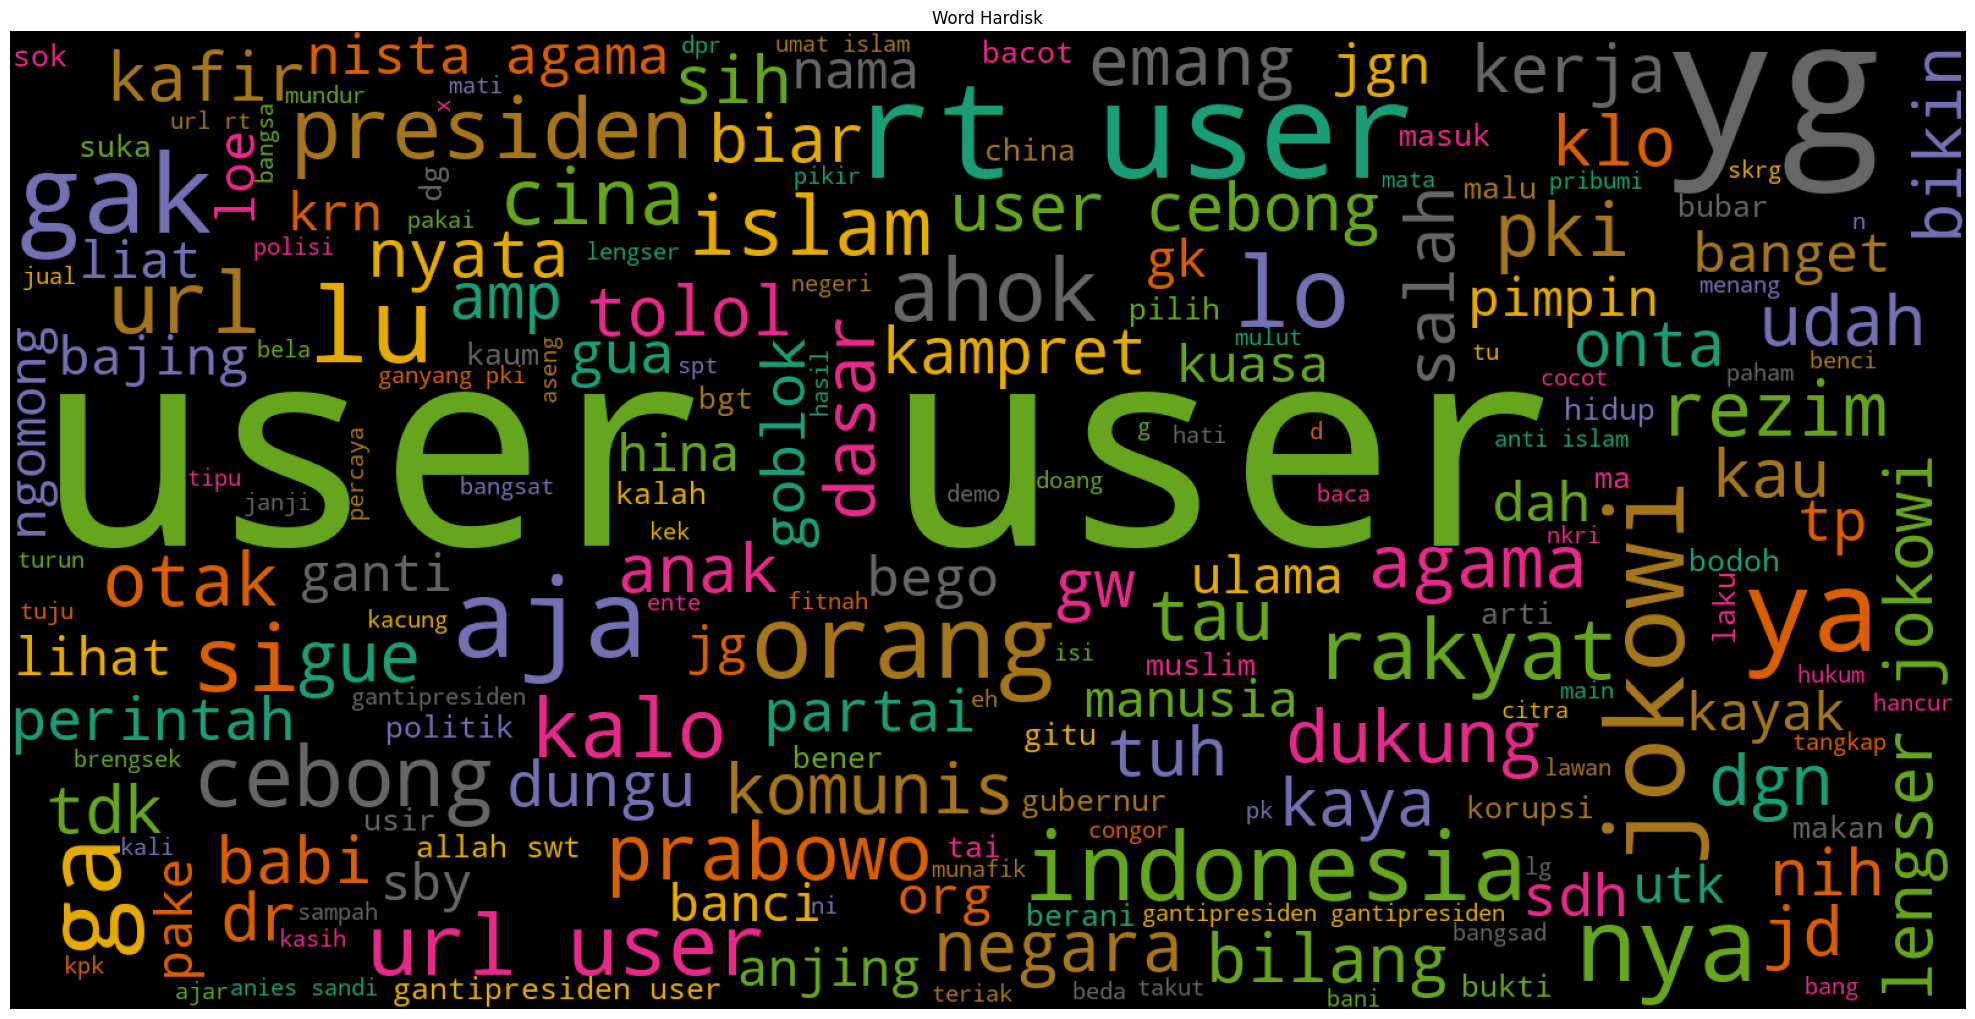

In [51]:
data_ = new_data_clean.loc[(new_data_clean['HS'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

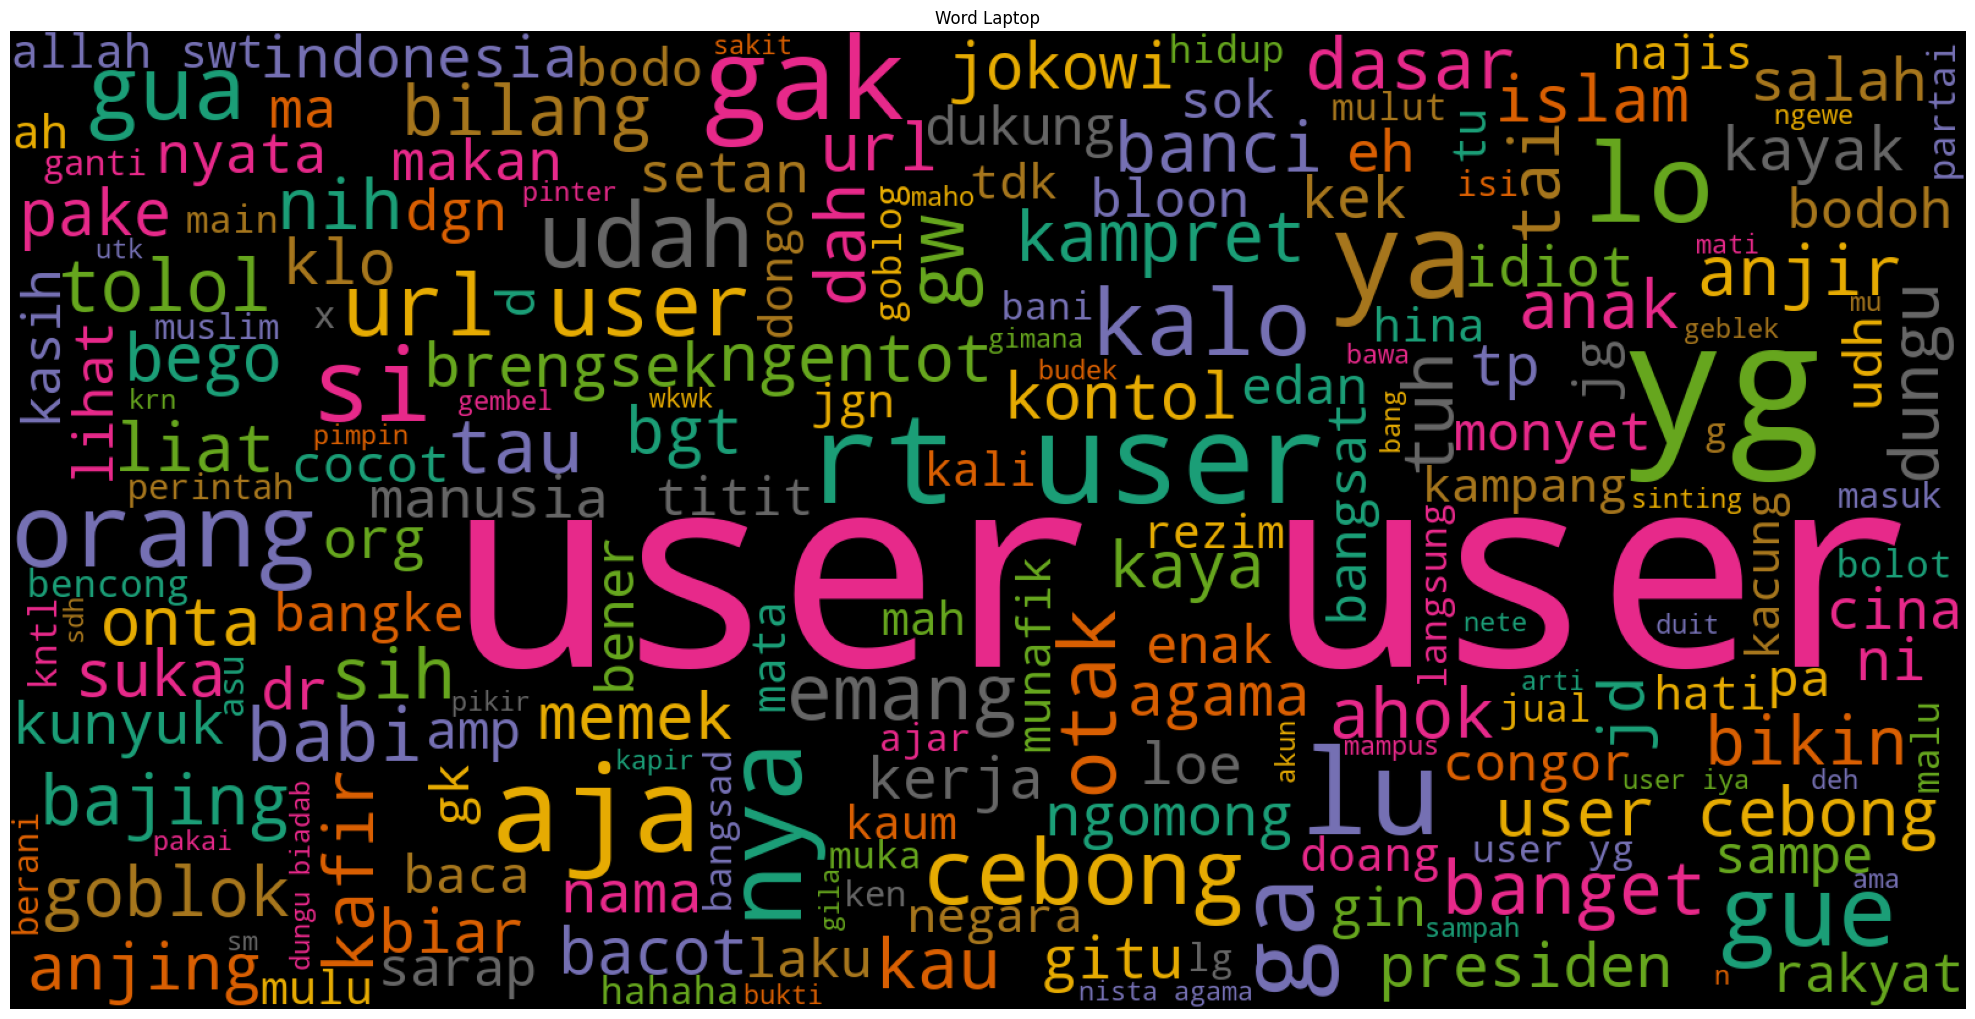

In [52]:
data_ = new_data_clean.loc[(new_data_clean['Abusive'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

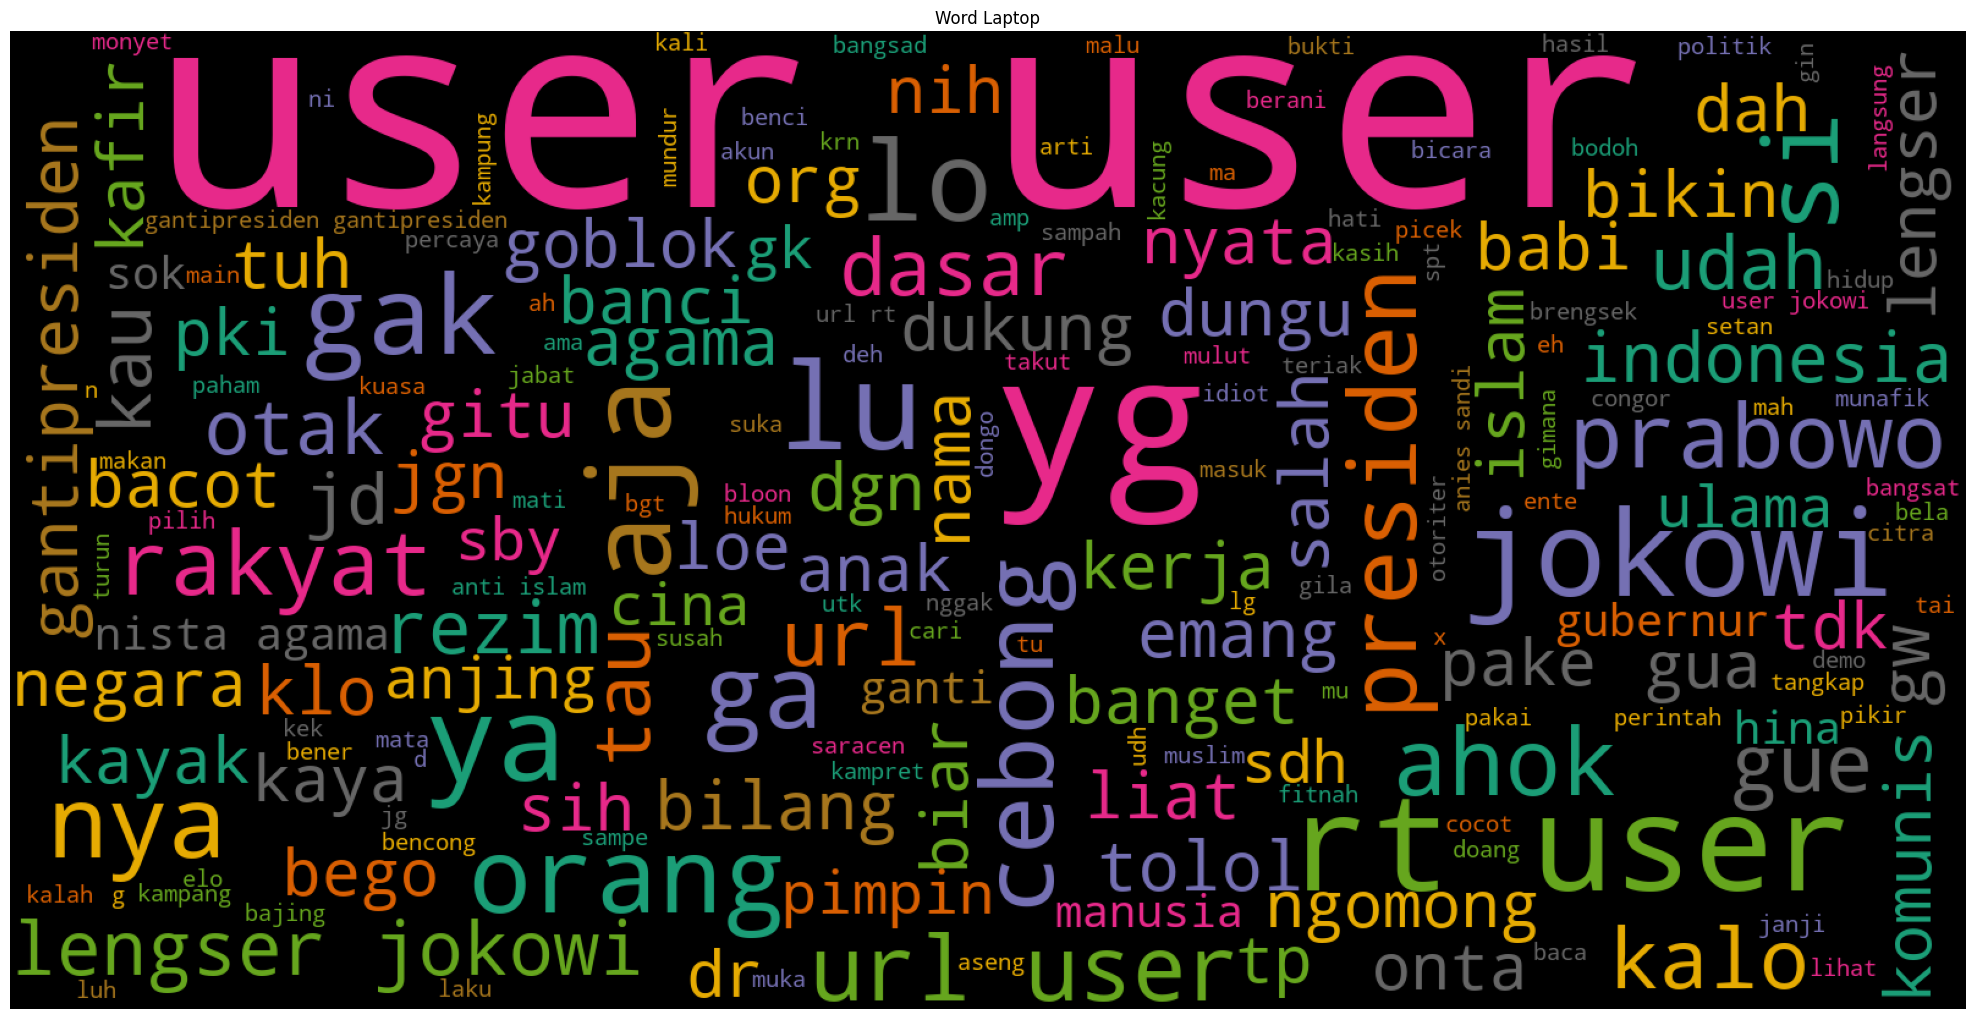

In [53]:
data_ = new_data_clean.loc[(new_data_clean['HS_Individual'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

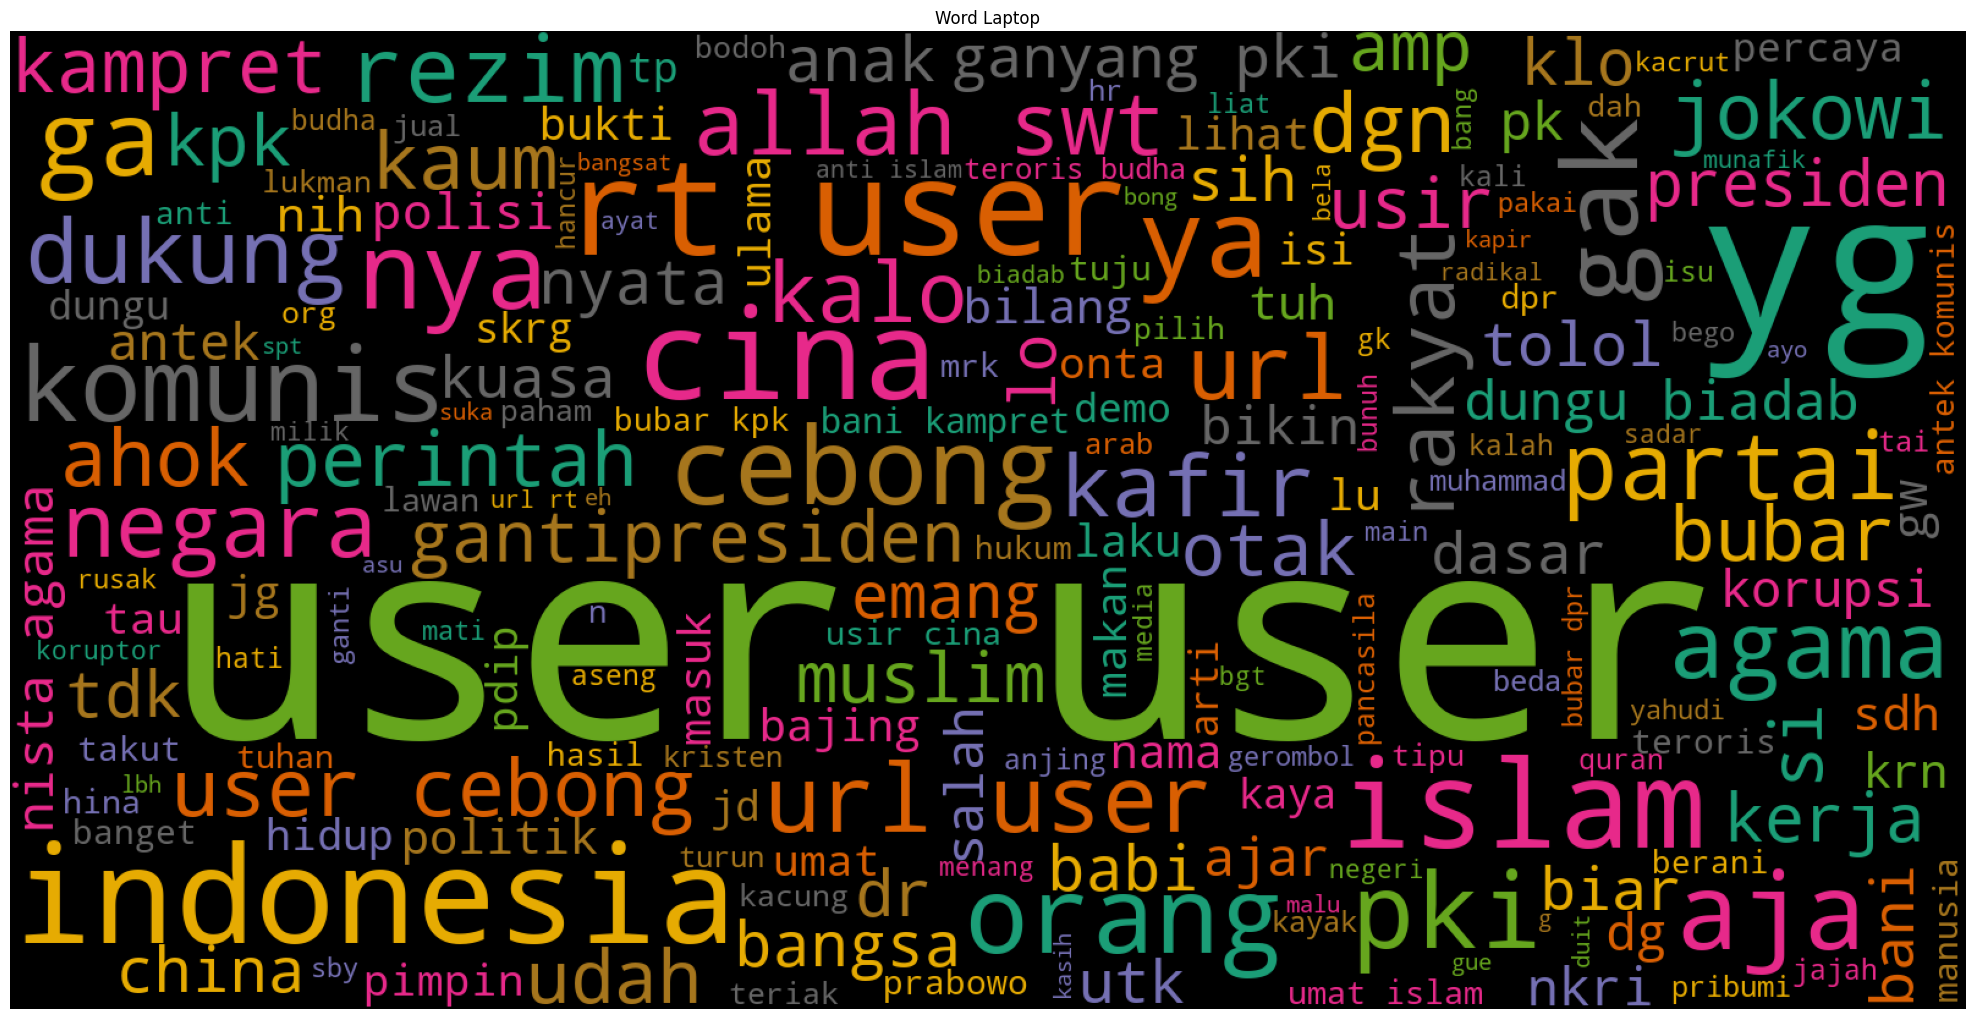

In [54]:
data_ = new_data_clean.loc[(new_data_clean['HS_Group'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Classification using SVM**

## **Label Encoder**
## **Using label encoder**

In [56]:
jumlah_per_baris = new_data_clean.sum(axis=1)
print(jumlah_per_baris)

0        5
1        1
2        0
3        0
4        5
        ..
13164    5
13165    1
13166    0
13167    0
13168    5
Length: 13169, dtype: int64


C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_18712\2319009063.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jumlah_per_baris = new_data_clean.sum(axis=1)


In [57]:
new_data_clean['jlh_speech'] = new_data_clean.sum(axis=1)

C:\Users\estika.ginting.ROOT\AppData\Local\Temp\ipykernel_18712\1836945414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data_clean['jlh_speech'] = new_data_clean.sum(axis=1)


In [58]:
new_data_clean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0             1        1            0          0   
1             0        0            0          0   
2             0        0            0          0   
3             0        0            0          0   
4             0        0            1          0   
...         ...      ...          ...        ...   
13164         0        1            0          0   
13165         0        0            0          0   
13166         0        0            0          0   
13167         0        0            0          0   
13168         1        1            0          0   

                                       result_text_clean  \
0       disaat semua cowok berusaha melacak perhatian...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau matamu sipit tap...   
4      user user kaum cebong kapir udah keliatan dong...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg s...   
13165                        user kasur mana enak kunyuk   
13166            user hati hati bisu gnnlagi bosan huft    
13167  user user user user bom yang real mudah terdet...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                            review_steem  \
0      saat semua cowok usaha lacak perhati gue loe l...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau mata sipit tapi ...   
4      user user kaum cebong kapir udah liat dongok d...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg k...   
13165                        user kasur mana enak kunyuk   
13166             user hati hati bisu gnnlagi bosan huft   
13167  user user user user bom yang real mudah deteks...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                    review_stp_sasatrawi  \
0       semua cowok usaha lacak perhati gue loe lanta...   
1      rt user user siapa 

In [59]:
def change_label (jlh_speech):
    if jlh_speech >= 3 :
        return ('High')
    elif jlh_speech>=1 and jlh_speech < 3 :
        return ('Moderate')
    else:
        return('Low')

In [61]:
new_data_clean['label'] = new_data_clean['jlh_speech'].apply(lambda x: change_label(x))

In [64]:
# new_data_clean['fit_label']=LabelEncoder().fit_transform(new_data_clean['label'])

In [65]:
new_data_clean

Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0        0            0          0   
1                  0         0            0        0            0          0   
2                  0         0            0        0            0          0   
3                  0         0            0        0            0          0   
4                  0         1            1        0            0          0   
...              ...       ...          ...      ...          ...        ...   
13164              1         0            0        0            1          0   
13165              0         0            0        0            0          0   
13166              0         0            0        0            0          0   
13167              0         0            0        0            0          0   
13168              1         0            0        0            0          0   

       HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0             1        1            0          0   
1             0        0            0          0   
2             0        0            0          0   
3             0        0            0          0   
4             0        0            1          0   
...         ...      ...          ...        ...   
13164         0        1            0          0   
13165         0        0            0          0   
13166         0        0            0          0   
13167         0        0            0          0   
13168         1        1            0          0   

                                       result_text_clean  \
0       disaat semua cowok berusaha melacak perhatian...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau matamu sipit tap...   
4      user user kaum cebong kapir udah keliatan dong...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg s...   
13165                        user kasur mana enak kunyuk   
13166            user hati hati bisu gnnlagi bosan huft    
13167  user user user user bom yang real mudah terdet...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                            review_steem  \
0      saat semua cowok usaha lacak perhati gue loe l...   
1      rt user user siapa yang telat ngasih tau elued...   
2      41 kadang aku berfikir kenapa aku tetap percay...   
3      user user aku itu akunnku tau mata sipit tapi ...   
4      user user kaum cebong kapir udah liat dongok d...   
...                                                  ...   
13164  user jangan asal ngomong ndasmu congor lu yg k...   
13165                        user kasur mana enak kunyuk   
13166             user hati hati bisu gnnlagi bosan huft   
13167  user user user user bom yang real mudah deteks...   
13168  user mana situ ngasih itu cuma foto ya kutil onta   

                                    review_stp_sasatrawi  \
0       semua cowok usaha lacak perhati gue loe lanta...   
1      rt user user siapa 

# **Split Data**

In [66]:
#split data
train, test = train_test_split(new_data_clean, test_size=0.25)